In [1]:
library(dplyr)
library(ggplot2)
library(paletteer)
library(igraph)
library(qgraph)
library(colorspace)
library(HiveR)
library(RColorBrewer)
library(grid)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”
Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”
Warning message:
“no DISPLAY variable so Tk is not available”


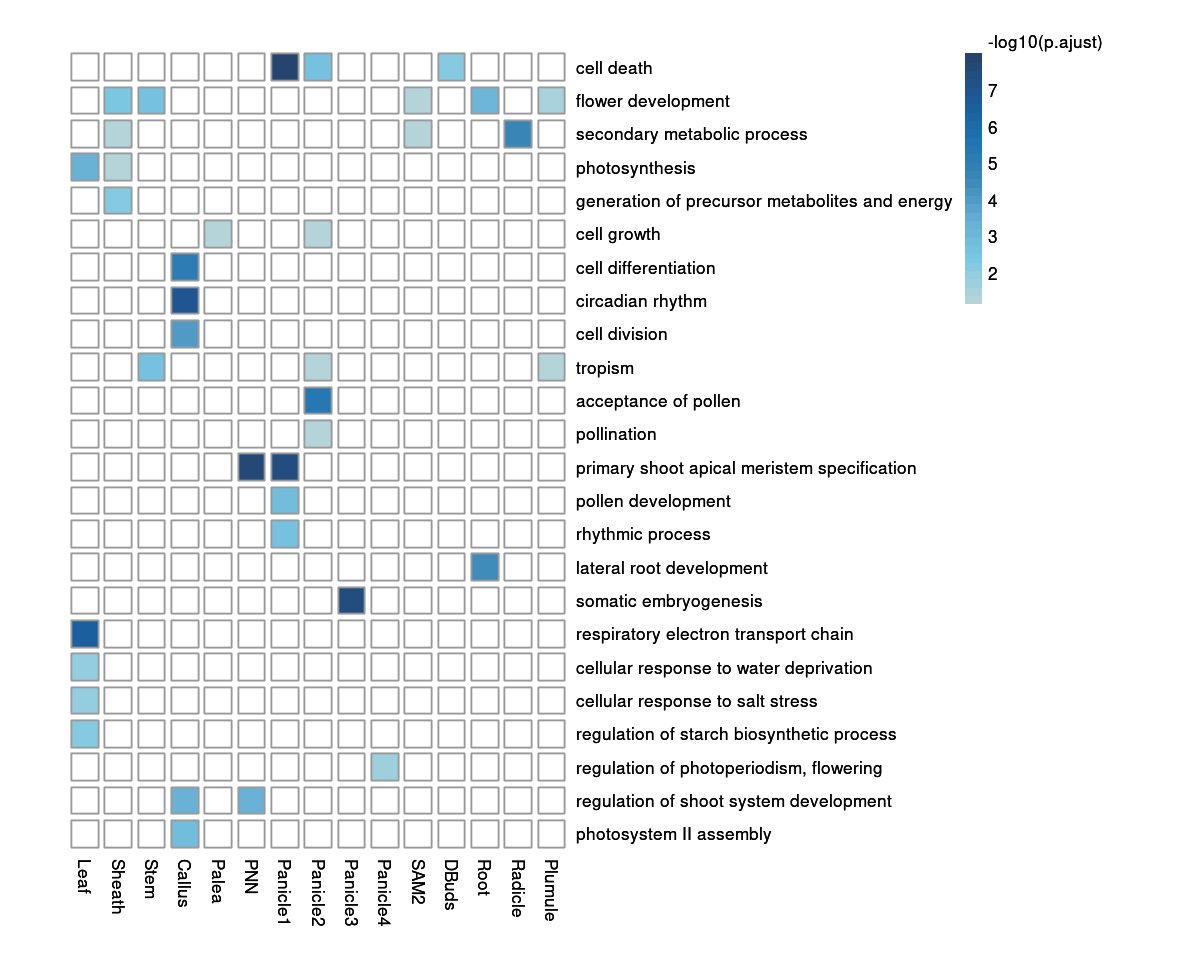

In [2]:
options(repr.plot.width=10,repr.plot.height=8)
GO_log <- readRDS("~/mirnome_data/Plot/tissue_specific_GO.RDS")
p1 <- pheatmap::pheatmap(GO_log,color=c(rep("white",0),paletteer_c("ggthemes::Classic Blue", 30)), cluster_rows = FALSE, cluster_cols = FALSE,
              gaps_row=c(1:nrow(GO_log)),gaps_col=c(1:1:ncol(GO_log)),cellwidth=16,cellheight = 16,na_col = "#FFFFFF",main="",
                         legend_breaks = c(2, 3, 4, 5,6,7,max(GO_log,na.rm = TRUE)),legend_labels = c("2", "3", "4", "5","6","7","-log10(p.ajust)\n"),
                        legend=TRUE)

p1

In [3]:
load("~/mirnome_data/Plot/tissue_specific_FFL.RData")

In [4]:
Module_tissue

Module1,Module2,Module3,Module4,Module5,Module6,Module7,Module8,Module9,Module10,Module11,Module12,Module13,Module14,Module15,Module16,Module17
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Stem,PNN,Leaf,Sheath,Callus,Panicle1,SAM1,AM1,Seed1,Lemma,Palea,Pistil,Stamen,Root,Plumule,Radicle,DBuds
NA,NA,NA,NA,NA,Panicle2,SAM2,AM2,Seed2,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,Panicle3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,Panicle4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
plot_network_by_tissue <- function(module, links, gene_TF_bound, tissue_anno_col,miRNA_target,seed=123,
                                   regular_color="#ffbb78",title="SAM FFL network") {


  d <- links[links$Module == module,]
  d <- unique(d)
  nodes <- unique(c(d$source, d$target))

  # 创建一个igraph对象
  net <- graph_from_data_frame(d, vertices = data.frame(name = nodes), directed = TRUE)  
   
  nodes <- as.data.frame(nodes) %>% setNames("nodes")
  nodes$color <- ifelse(nodes$nodes %in% gene_TF_bound$TFBS_name, "#4E79A7", ifelse(nodes$nodes %in% miRNA_target$miRNA_name, '#F28E2B', '#59A14F'))
  V(net)$color <- nodes$color 
  E(net)$color <- adjustcolor('#000000', alpha=.5)
  E(net)$width <- 0.5 
  E(net)$arrow.size <- .2 
  E(net)$arrow.width <- .4
  V(net)$label.cex <- 0.7
  V(net)$label.color <- "black"
  V(net)$label.font <- 3  
  V(net)$label.dist <- 0.8
  V(net)$frame.color <- darken(V(net)$color,0.4)
  V(net)$frame.width <- 10  
  V(net)$label.n <- 0  
  V(net)$shape <- "circle"
  V(net)$size <-5
        

  e <- get.edgelist(net,names=FALSE)
  l <- qgraph.layout.fruchtermanreingold(e,vcount=vcount(net),
                                         area=12*(vcount(net)^2),repulse.rad=(vcount(net)^3.1))
  plot(net,layout=l,vertex.size=6)
  title(title)
}


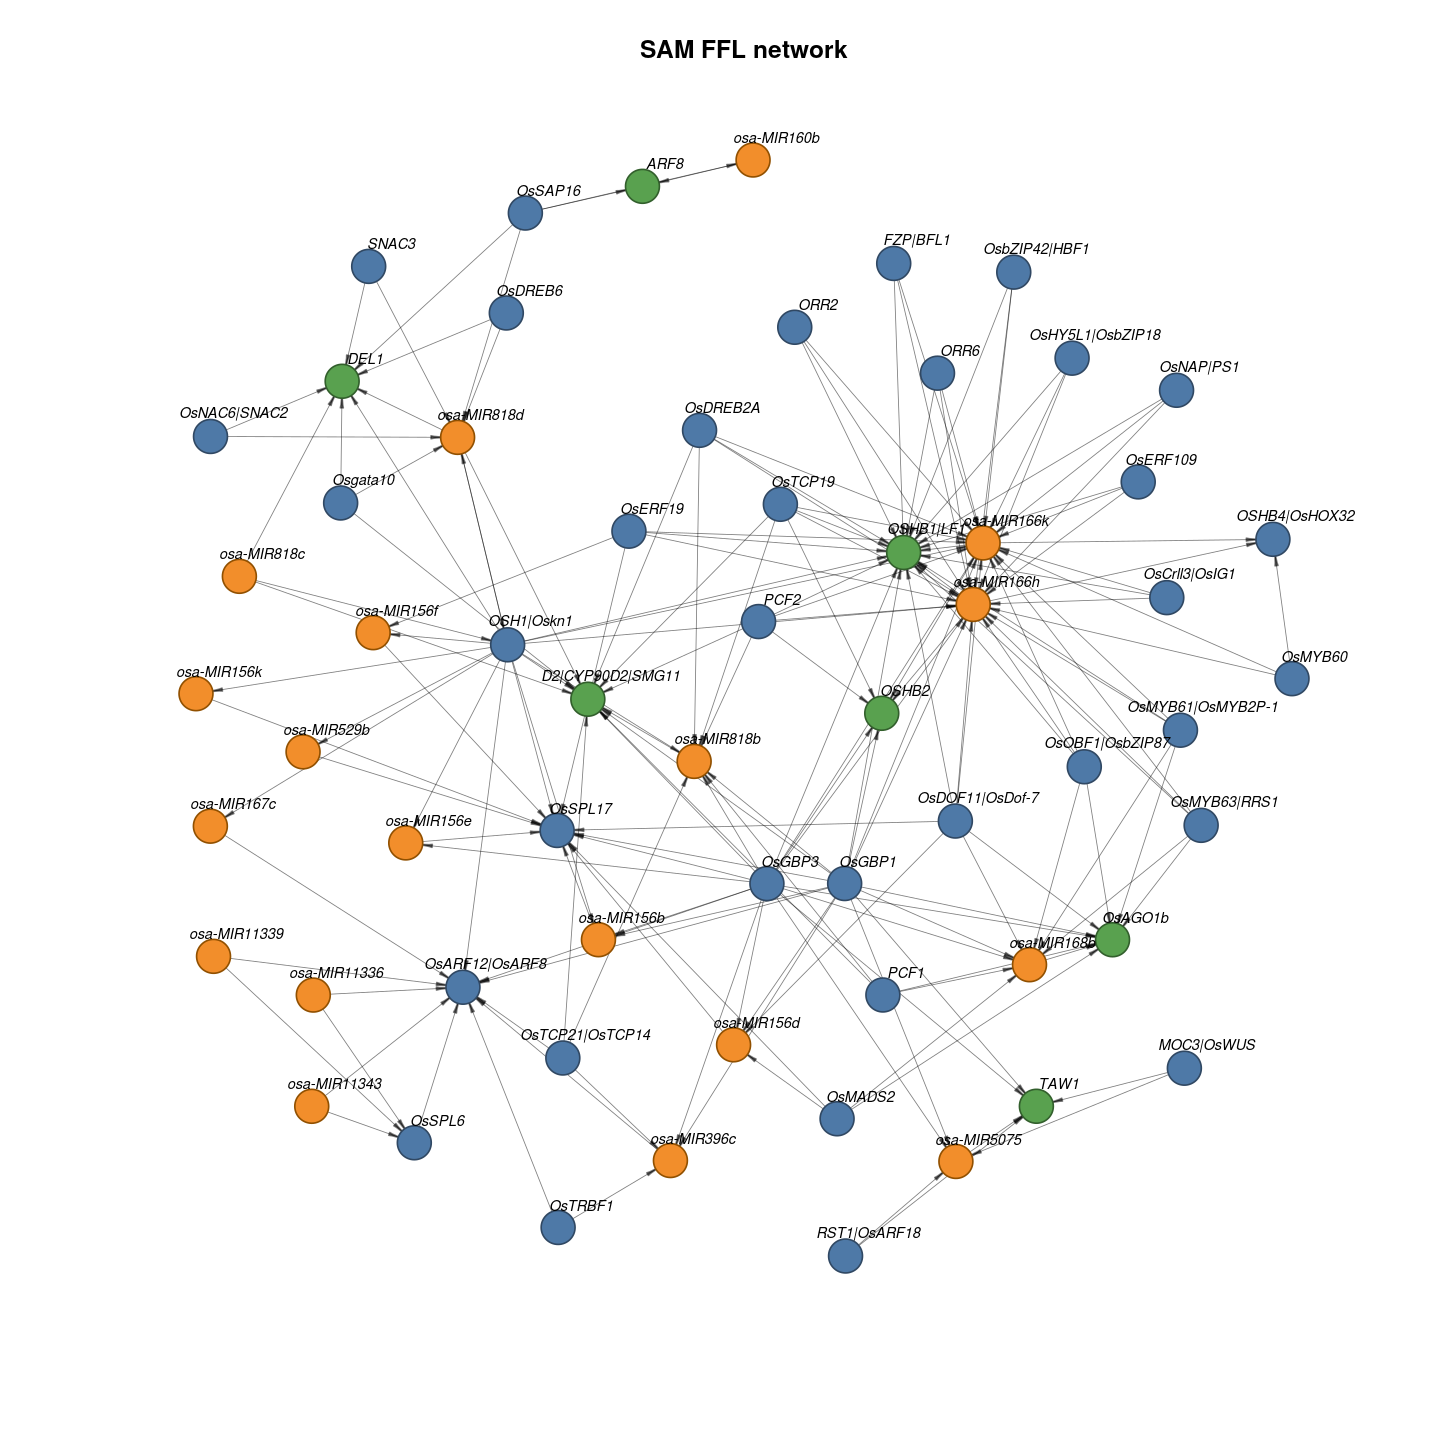

In [6]:
options(repr.plot.width=12,repr.plot.height=12)
plot_network_by_tissue("Module7",links, gene_TF_bound, tissue_anno_col,miRNA_target)

In [7]:

mod.edge2HPD <- function(edge_df = NULL, unique.rows = TRUE, axis.cols = NULL, type = "2D", desc = NULL, edge.weight = NULL, edge.color = NULL, node.color = NULL, node.size = NULL, node.radius = NULL, node.axis = NULL) 
{
  #edge.weight - a list corresponding to edge weights (same order as in edge_df)
  #edge.color - a lis corresponding to edge colors (same order as in edge_df)
  #node.color - a data frame consisting of two columns: column 1 - node labels, column 2 - node color
  #node.size - a data frame consisting of two columns: column 1 - node labels, column 2 - node size
  #node.radius - a data frame consisting of two columns: column 1 - node labels, column 2 - node radius
  #node.axis - a data frame consisting of two columns: column 1 - node labels, column 2 - node axis
  
  if (is.null(edge_df)){
    stop("No edge data provided")
  }
  if (!is.data.frame(edge_df)){
    stop("edge_df is not a data frame")
  }
  if (unique.rows)
  {
    nr.old <- nrow(edge_df)
    edge_df <- unique(edge_df)
    
    if (nr.old > nrow(edge_df))
      cat("\n\t", nr.old - nrow(edge_df), "non-unique data-frame rows removed!\n\n")
  }
  
  # Get node labels
  lab1 <- as.character(unlist(edge_df[, 1]))
  lab2 <- as.character(unlist(edge_df[, 2]))
  
  
  # Get number of unique nodes
  nn <- length(unique(c(lab1, lab2)))
  
  # Define node ID
  id <- 1:nn
  # Define node label
  label <- unique(c(lab1, lab2))
  # Create a data frame for node attributes
  node.attributes <- data.frame(id, label)
  
####################################################
# Node size definition
  if (!is.null(node.size))
  {
    if (is.numeric(node.size[, 2]) | is.integer(node.size[, 2]))
    {
      nSize <- c()
      
      for (i in 1:length(label))
      {
        indx <- which(as.character(node.size[,1]) == label[i])
        
        if (length(indx[1]) != 0)
          nSize = c(nSize, node.size[indx[1],2])
        else
        {
          msg <- paste("No size data provided for the node ", nodes$id[n], ". Value 1 will be assigned to this node!", sep = "")
          warning(msg)
          nSize = c(nSize, 1)
        }
      }
          
      node.attributes <- cbind(node.attributes, size = nSize)
      rm(i, nSize, indx)
    }#is.numeric
    else{
      stop("Node size is not numeric or integer.")  
      }
  }#is.null
    
  if (is.null(node.size))
  {
    warning("No data provided for the node size. All nodes will be assigned size 1!")
    node.attributes <- cbind(node.attributes, size = rep(1, nn))
  }
    
####################################################
# Node color definition
  
  if (!is.null(node.color))
  {
    nCol <- c()
      
    for (i in 1:length(label))
    {
      indx <- which(as.character(node.color[,1]) == label[i])
      
      if (length(indx[1]) != 0)
        nCol = c(nCol, as.character(node.color[indx[1],2]))
      else
      {
        msg <- paste("No color data provided for the node ", nodes$id[n], ". Black color will be assigned to this node!", sep = "")
        warning(msg)
        nCol = c(nCol, "black")
      }
    }
    
    node.attributes <- cbind(node.attributes, color = nCol)
    rm(i, nCol, indx)
  }#is.null
  
  if (is.null(node.color))
  {
    warning("No data provided for the node color. All nodes will be colored black!")
    node.attributes <- cbind(node.attributes, color = as.character(rep("black", nn)))
  }
  
####################################################
# Node radius definition

  if (!is.null(node.radius))
  {
    if (is.numeric(node.radius[, 2]) | is.integer(node.radius[, 2]))
    {
      nSize <- c()
      
      for (i in 1:length(label))
      {
        indx <- which(as.character(node.radius[,1]) == label[i])
        
        if (length(indx[1]) != 0)
          nSize = c(nSize, node.radius[indx[1],2])
        else
        {
          msg <- paste("No raidus data provided for the node ", nodes$id[n], ". Random values will be assigned!", sep = "")
          warning(msg)
          nSize = c(nSize,  sample(nn, 1))
        }
      }
      
      node.attributes <- cbind(node.attributes, radius = nSize)
      rm(i, nSize, indx)
    }#is.numeric
    else{
      stop("Node raidus is not integer.")  
    }
  }#is.null
  
  if (is.null(node.radius))
  {
    warning("No data provided for the node radius. All nodes will be assigned random radius values")
    node.attributes <- cbind(node.attributes, radius = sample(nn, nn))
  }
  
####################################################
# Node axis definition
  
  if (!is.null(node.axis))
  {
    if (is.integer(node.axis[, 2]))
    {
      nSize <- c()
      
      for (i in 1:length(label))
      {
        indx <- which(as.character(node.axis[,1]) == label[i])
        
        if (length(indx[1]) != 0)
          nSize = c(nSize, node.axis[indx[1],2])
        else
        {
          msg <- paste("No axis data provided for the node ", nodes$id[n], ". This node will be assigned to axis 1!", sep = "")
          warning(msg)
          nSize = c(nSize,  1)
        }
      }
      
      node.attributes <- cbind(node.attributes, axis = nSize)
      rm(i, nSize, indx)
    }#is.integer
    else{
      stop("Node axis is not integer.")  
    }
  }#is.null
  
  if (is.null(node.axis))
  {
    warning("No data provided for the node axis. All nodes will be assigned to axis 1")
    node.attributes <- cbind(node.attributes, axis = rep(1, nn))
  }

  ######################################################
  
  # Create HPD object
  HPD <- list()
  
  # Define node attributes
  HPD$nodes$id <- as.integer(node.attributes$id)
  HPD$nodes$lab <- as.character(node.attributes$label)
  HPD$nodes$axis <- as.integer(node.attributes$axis)
  HPD$nodes$radius <- as.numeric(node.attributes$radius)
  HPD$nodes$size <- as.numeric(node.attributes$size)
  HPD$nodes$color <- as.character(node.attributes$color)
  
  ####################################################
  
  # Get number of edges
  ne <- nrow(edge_df)
    
  ####################################################
  # Edge weight definition
  
  if (!(is.null(edge.weight))) 
  {
    if (length(edge.weight) != nrow(edge_df))
      stop("Edge weights are not provided for all edges!") 
      
    if (is.numeric(edge.weight) | is.integer(edge.weight))
      edge_df <- cbind(edge_df, weight = edge.weight)
    else
      stop("Edge weight column is not numeric or integer.")  
  } 

  if (is.null(edge.weight))
  {
    warning("No edge weight provided Setting default edge weight to 1")
    edge_df <- cbind(edge_df, weight = rep(1, ne))
  }
  
  ####################################################
  # Edge color definition
  
  if (!(is.null(edge.color))) 
  {
    if (length(edge.color) != nrow(edge_df))
      stop("Edge colors are not provided for all edges!") 
    else 
      edge_df <- cbind(edge_df, color = as.character(edge.color))
  } 
  
  if (is.null(edge.color))
  {
    warning("No edge color provided. Setting default edge color to gray")
    edge_df <- cbind(edge_df, color = rep("gray", ne))
  }
  
  ####################################################
  # Set up edge list
  # Merge by default sorts things and changes the order of edges, so edge list has to stay paired
  edge.hlp <- merge(edge_df, node.attributes[, 1:2], by.x = 1, by.y = "label")
  edge <- merge(edge.hlp, node.attributes[1:2], by.x = 2, by.y = "label")
  
  HPD$edges$id1 <- as.integer(edge$id.x)
  HPD$edges$id2 <- as.integer(edge$id.y)
  
  HPD$edges$weight <- as.numeric(edge$weight)
  HPD$edges$color <- as.character(edge$color)
  
  HPD$nodes <- as.data.frame(HPD$nodes)
  HPD$edges <- as.data.frame(HPD$edges)
  
  # Add description
  if (is.null(desc)) {
    desc <- "No description provided"
  }
  HPD$desc <- desc
  
  # Define axis columns
  if (is.null(axis.cols)){
    axis.cols <- brewer.pal(length(unique(HPD$nodes$axis)), "Set1")
  }

  
  HPD$axis.cols <- axis.cols
  HPD$nodes$axis <- as.integer(HPD$nodes$axis)
  HPD$nodes$size <- as.numeric(HPD$nodes$size)
  HPD$nodes$color <- as.character(HPD$nodes$color)
  HPD$nodes$lab <- as.character(HPD$nodes$lab)
  HPD$nodes$radius <- as.numeric(HPD$nodes$radius)
  HPD$nodes$id <- as.integer(HPD$nodes$id)
  HPD$edges$id1 <- as.integer(HPD$edges$id1)
  HPD$edges$id2 <- as.integer(HPD$edges$id2)
  HPD$edges$weight <- as.numeric(HPD$edges$weight)
  HPD$edges$color <- as.character(HPD$edges$color)
  HPD$type <- type
  
  class(HPD) <- "HivePlotData"
  
  # Check HPD object
  chkHPD(HPD)
  return (HPD)
}

Warning message in mod.edge2HPD(edge_df = edges[, c("id1", "id2")], edge.color = edges[, :
“No edge weight provided Setting default edge weight to 1”



	 3 edge(s) that start and end on the same node were removed

	 5 virtual self-edge(s) were removed


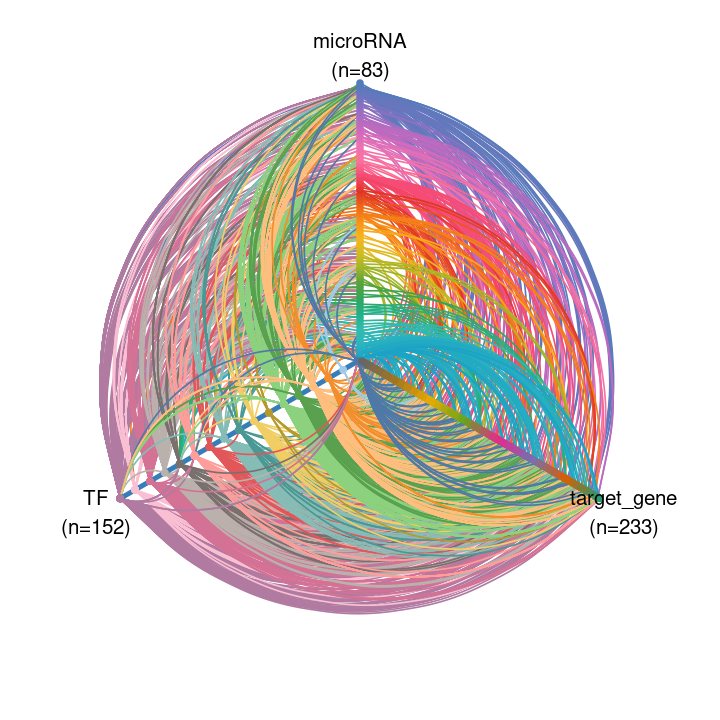

In [8]:
edges <- readRDS("~/mirnome_data/Plot/hive_plot_edges.rds")
nodes <- readRDS("~/mirnome_data/Plot/hive_plot_nodes.rds")
hive1 <- mod.edge2HPD(edge_df = edges[, c("id1","id2")], 
                      edge.color = edges[, "color"], node.color = nodes[,c("lab", "color")], 
                      node.size = nodes[,c("lab", "size")], node.radius = nodes[,c("lab", "radius")], 
                      node.axis = nodes[,c("lab", "axis")])
hive2 <- mineHPD(hive1, option = "remove zero edge")
hive3 <- manipAxis(hive2, method = "stretch", action = c(12,12,12))
options(repr.plot.height=6,repr.plot.width=6)
plotHive(hive3,bkgnd="white",axLabs = c("microRNA\n(n=83)","TF\n(n=152)",
                                                      "target_gene\n(n=233)"),axLab.gpar = gpar(col ="black"))